In [1]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

EyePacs

In [ ]:
xtrainaptos = np.load('/content/drive/My Drive/tesis/eyepacs/xtrainchf.npy')
aptostraindf = pd.read_csv('/content/drive/My Drive/tesis/eyepacs/trainLabels.csv')

In [ ]:
xtrainaptos.shape

(35125, 224, 224, 3)

In [ ]:
eyetraindf = pd.read_csv('/content/drive/My Drive/tesis/eyepacs/trainLabels.csv')
eyetraindf1 = eyetraindf[eyetraindf.image != '43862_left']

In [ ]:
ytrain1 = pd.get_dummies(eyetraindf1['level']).values

In [ ]:
print(xtrainaptos.shape)
print(ytrain1.shape)

(35125, 224, 224, 3)
(35125, 5)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
    xtrainaptos, ytrain1, 
    test_size=0.4489110, 
    random_state=2020
)

In [ ]:
print(x_train_2.shape)
print(y_train_2.shape)

(15768, 224, 224, 3)
(15768, 5)


In [ ]:
xtrainaptos = 0
ytrain1 = 0
x_train_1 = 0
y_train_1 = 0

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x_train_2, y_train_2, 
    test_size=0.20, 
    random_state=2020
)

In [ ]:
x_train_2 = 0
y_train_2 = 0

In [ ]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(12614, 224, 224, 3)
(3154, 224, 224, 3)
(12614, 5)
(3154, 5)


Se entrena la arquitectura con los anteriores datos

APTOS

- (2343, 224, 224, 3)
- (586, 224, 224, 3)
- (733, 224, 224, 3)

In [3]:
xtrainaptos = np.load('/content/drive/My Drive/tesis/aptos/train224.npy')
aptostraindf = pd.read_csv('/content/drive/My Drive/tesis/aptos/train.csv')

In [ ]:
train, test = train_test_split(aptostraindf, test_size=0.2, random_state=2020)

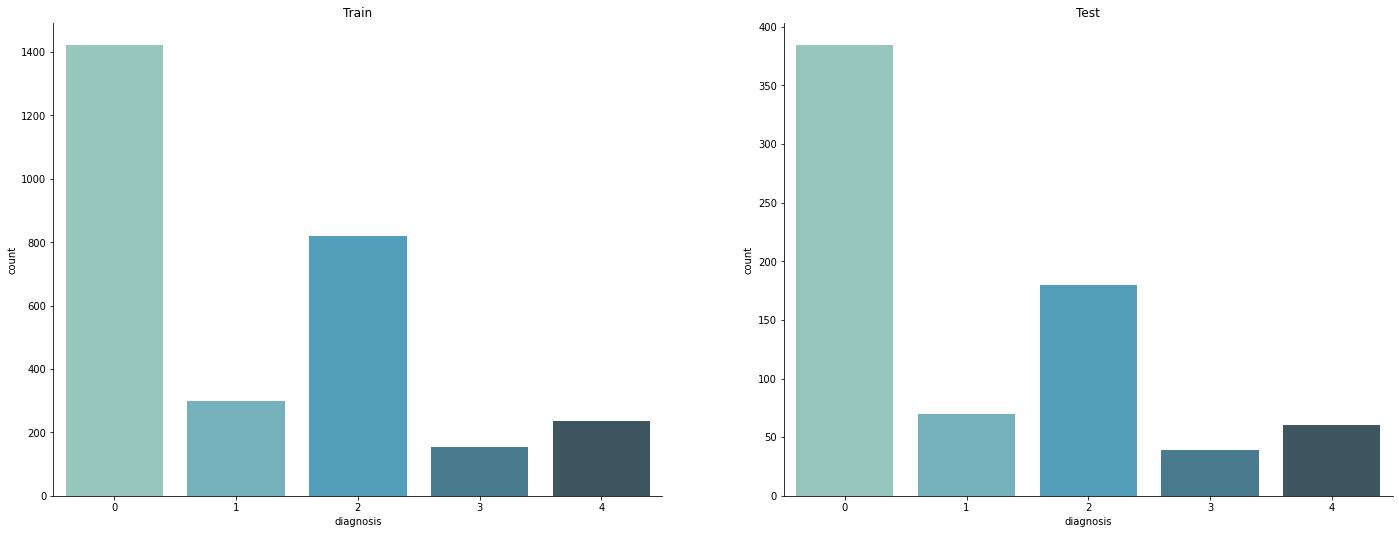

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 8.7))
sns.countplot(x="diagnosis", data=train, palette="GnBu_d", ax=ax1).set_title('Train')
sns.countplot(x="diagnosis", data=test, palette="GnBu_d", ax=ax2).set_title('Test')
sns.despine()
plt.show()

In [ ]:
train['set'] = 'train'
test['set'] = 'test'
train_complete = train.append(test)
train_complete.head()
#train_complete.to_csv('/content/drive/My Drive/tesis2/exp3hold-out.csv', index=False)
train_complete.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_code,diagnosis,set
1196,52ae917fcea4,1,train
2447,aa4407aab872,0,train
1511,6a57a3db3eff,0,train
1917,873dcc0b468f,4,train
444,1f4bf8e28b41,2,train


In [ ]:
train_complete['index'] = train_complete.index
train_complete

,id_code,diagnosis,set,index
1196,52ae917fcea4,1,train,1196
2447,aa4407aab872,0,train,2447
1511,6a57a3db3eff,0,train,1511
1917,873dcc0b468f,4,train,1917
444,1f4bf8e28b41,2,train,444
...,...,...,...,...
2414,a88365134c3c,0,test,2414
1290,59ee65760535,2,test,1290
196,0e82bcacc475,4,test,196
2587,b3819a805dca,4,test,2587


In [ ]:
train_complete.to_csv('/content/drive/My Drive/tesis2/exp3hold-out.csv', index=False)

In [5]:
train_complete= pd.read_csv('/content/drive/My Drive/tesis2/exp3hold-out.csv')

In [6]:
train_complete

,id_code,diagnosis,set,index
0,52ae917fcea4,1,train,1196
1,aa4407aab872,0,train,2447
2,6a57a3db3eff,0,train,1511
3,873dcc0b468f,4,train,1917
4,1f4bf8e28b41,2,train,444
...,...,...,...,...
3657,a88365134c3c,0,test,2414
3658,59ee65760535,2,test,1290
3659,0e82bcacc475,4,test,196
3660,b3819a805dca,4,test,2587


In [ ]:
train

,id_code,diagnosis,set
1196,52ae917fcea4,1,train
2447,aa4407aab872,0,train
1511,6a57a3db3eff,0,train
1917,873dcc0b468f,4,train
444,1f4bf8e28b41,2,train
...,...,...,...
2139,96ce10a1dbd7,0,train
2678,b960142a8de7,3,train
3395,eb32a815f78c,2,train
392,1c9c583c10bf,0,train


In [ ]:
test

,id_code,diagnosis,set
1871,840527bc6628,2,test
2891,c8fc0df22999,1,test
2104,93be637084a2,1,test
863,3e61703b5ab2,0,test
1287,599b89048034,2,test
...,...,...,...
2414,a88365134c3c,0,test
1290,59ee65760535,2,test
196,0e82bcacc475,4,test
2587,b3819a805dca,4,test


In [ ]:
test.loc[2891]

id_code      c8fc0df22999
diagnosis               1
set                  test
Name: 2891, dtype: object

In [ ]:
for fold_n, (trn_idx, val_idx) in enumerate(folds.split(train, train['diagnosis'])):
  print(trn_idx)
  print(val_idx)

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for fold_n, (trn_idx, val_idx) in enumerate(folds.split(train, train['diagnosis'])):
    print('Fold: %s, Train size: %s, Validation size %s' % 
          (fold_n, len(trn_idx), len(val_idx)))
    train[('fold_%s' % fold_n)] = 0
    train[('fold_%s' % fold_n)].iloc[trn_idx] = 'train'
    train[('fold_%s' % fold_n)].iloc[val_idx] = 'validation'
    

Fold: 0, Train size: 2343, Validation size 586
Fold: 1, Train size: 2343, Validation size 586
Fold: 2, Train size: 2343, Validation size 586
Fold: 3, Train size: 2343, Validation size 586
Fold: 4, Train size: 2344, Validation size 585


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impo

In [ ]:
train['index'] = train.index
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_code,diagnosis,set,fold_0,fold_1,fold_2,fold_3,fold_4,index
1196,52ae917fcea4,1,train,train,train,train,train,validation,1196
2447,aa4407aab872,0,train,train,train,train,train,validation,2447
1511,6a57a3db3eff,0,train,train,train,validation,train,train,1511
1917,873dcc0b468f,4,train,train,train,validation,train,train,1917
444,1f4bf8e28b41,2,train,train,train,train,train,validation,444
...,...,...,...,...,...,...,...,...,...
2139,96ce10a1dbd7,0,train,validation,train,train,train,train,2139
2678,b960142a8de7,3,train,train,train,validation,train,train,2678
3395,eb32a815f78c,2,train,validation,train,train,train,train,3395
392,1c9c583c10bf,0,train,train,train,train,validation,train,392


In [ ]:
train.to_csv('/content/drive/My Drive/tesis2/exp3_5-fold.csv', index=False)

In [7]:
train_df = pd.read_csv('/content/drive/My Drive/tesis2/exp3_5-fold.csv')

In [8]:
train_df

,id_code,diagnosis,set,fold_0,fold_1,fold_2,fold_3,fold_4,index
0,52ae917fcea4,1,train,train,train,train,train,validation,1196
1,aa4407aab872,0,train,train,train,train,train,validation,2447
2,6a57a3db3eff,0,train,train,train,validation,train,train,1511
3,873dcc0b468f,4,train,train,train,validation,train,train,1917
4,1f4bf8e28b41,2,train,train,train,train,train,validation,444
...,...,...,...,...,...,...,...,...,...
2924,96ce10a1dbd7,0,train,validation,train,train,train,train,2139
2925,b960142a8de7,3,train,train,train,validation,train,train,2678
2926,eb32a815f78c,2,train,validation,train,train,train,train,3395
2927,1c9c583c10bf,0,train,train,train,train,validation,train,392


In [9]:
train = pd.read_csv('/content/drive/My Drive/tesis2/exp3_5-fold.csv')

In [ ]:
fold1 = pd.get_dummies(train['fold_0']).values

In [10]:
X_train = train[train['fold_0'] == 'train']
X_val = train[train['fold_0'] == 'validation']

In [11]:
X_test = train_complete[train_complete['set'] == 'test']

In [12]:
x_train_i = X_train['index'].values
x_val_i = X_val['index'].values

In [13]:
x_test_i = X_test['index'].values

In [14]:
x_test_i.shape

(733,)

In [15]:
y_train = pd.get_dummies(aptostraindf['diagnosis']).values

In [ ]:
y_train.shape

(3662, 5)

In [18]:
y_train.shape

(3662, 5)

In [17]:
x_train.shape

(3662, 224, 224, 3)

In [16]:
x_train = np.load('/content/drive/My Drive/tesis/aptos/train224.npy')

In [19]:
x_train1 = np.empty((2343,224,224,3),dtype='uint8')
x_val1 = np.empty((586,224,224,3),dtype='uint8')

y_train1 =  np.empty((2343,5),dtype='uint8')
y_val1 = np.empty((586,5),dtype='uint8')

for i in range(len(x_train_i)):
  x_train1[i] = x_train[x_train_i[i]]
  y_train1[i] = y_train[x_train_i[i]]

for j in range(len(x_val_i)):
  x_val1[j] = x_train[x_val_i[j]]
  y_val1[j] = y_train[x_val_i[j]]

In [20]:
x_test1= np.empty((733,224,224,3),dtype='uint8')
y_test1= np.empty((733,5),dtype='uint8')

for i in range(len(x_test_i)):
  x_test1[i]= x_train[x_test_i[i]]
  y_test1[i]= y_train[x_test_i[i]]

In [21]:
print(x_test1.shape)
print(y_test1.shape)

(733, 224, 224, 3)
(733, 5)


In [22]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(2343, 224, 224, 3)
(586, 224, 224, 3)
(2343, 5)
(586, 5)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

In [24]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [25]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [ ]:
vdata_gen =  val_datagen.flow(x_test1, y_test1, batch_size=BATCH_SIZE, seed=2020)
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)

In [26]:
vdata_gen =  val_datagen.flow(x_val1, y_val1, batch_size=BATCH_SIZE, seed=2020)
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)

In [ ]:
STEP_SIZE_TRAIN = len(x_train1)//BATCH_SIZE
STEP_SIZE_VALID = len(x_test1)//BATCH_SIZE

In [27]:
STEP_SIZE_TRAIN = len(x_train1)//BATCH_SIZE
STEP_SIZE_VALID = len(x_val1)//BATCH_SIZE

In [28]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 4.8MB/s 


In [29]:
import efficientnet.keras as efn 

In [30]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [31]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights='imagenet',include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)
    return model

In [32]:
model = create_model(input_shape=(224, 224, 3), n_out=5)

for layer in model.layers:
    layer.trainable = True
model.summary()

115515392/115515256 [==============================] - 4s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
____________________

In [33]:
def label_smoothing(y_true,y_pred):
     return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.1)

In [34]:
model.compile(loss=label_smoothing ,optimizer= 'Adam',metrics=['accuracy'])

In [35]:
class QWKEvaluation(Callback):
    def __init__(self, validation_data, batch_size=32, interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.batch_size = batch_size
        self.y_vals = validation_data
        self.history = []

    def on_epoch_end(self, epoch, logs={}):
        X_val = self.y_vals[0]
        y_val = self.y_vals[1]

        if epoch % self.interval == 0:
            y_pred = self.model.predict(X_val,verbose = 1)

            def flatten(y):
                return np.argmax(y, axis=1).reshape(-1)
            
            score = cohen_kappa_score(flatten(y_val),
                                      flatten(y_pred),
                                      labels=[0,1,2,3,4],
                                      weights='quadratic')
            print("\n epoch: %d - QWK_score: %.6f \n" % (epoch+1, score))
            self.history.append(score)
            if score >= max(self.history):
                print('saving checkpoint: ', score)
                self.model.save('densenet_bestqwk.h5')

qwk = QWKEvaluation(validation_data=(x_val1/255.0, y_val1),
                    batch_size=32, interval=1)

In [36]:
from datetime import datetime

In [37]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
historip =model.fit(data_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=vdata_gen,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=40,
                              callbacks=[tensorboard_callback],
                              verbose=1).history

Epoch 1/40
   1/1576 [..............................] - ETA: 0s - loss: 1.7172 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1576/1576 [==============================] - 286s 181ms/step - loss: 0.8920 - accuracy: 0.7212 - val_loss: 0.7841 - val_accuracy: 0.7462
Epoch 2/40
1576/1576 [==============================] - 283s 179ms/step - loss: 0.8021 - accuracy: 0.7397 - val_loss: 0.7591 - val_accuracy: 0.7560
Epoch 3/40
1576/1576 [==============================] - 283s 179ms/step - loss: 0.7726 - accuracy: 0.7519 - val_loss: 0.7584 - val_accuracy: 0.7636
Epoch 4/40
1576/1576 [==============================] - 282s 179ms/step - loss: 0.7510 - accuracy: 0.7580 - val_loss: 0.7403 - val_accuracy: 0.7757
Epoch 5/40
1576/1576 [======================

In [ ]:
model.save('/content/drive/My Drive/tesis2/exp3firstTL.h5')

In [38]:
model.load_weights('/content/drive/My Drive/tesis2/exp3firstTL.h5')

In [39]:
for layer in model.layers:
    layer.trainable = False

for i in range(-14, 0):
    model.layers[i].trainable = True
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [40]:
historip =model.fit(data_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=vdata_gen,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=15,
                              callbacks=[tensorboard_callback],
                              verbose=1).history

Epoch 1/15
 1/73 [..............................] - ETA: 0s - loss: 1.4533 - accuracy: 0.6562WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
73/73 [==============================] - 42s 570ms/step - loss: 0.9214 - accuracy: 0.7637 - val_loss: 0.8152 - val_accuracy: 0.7812
Epoch 2/15
73/73 [==============================] - 38s 516ms/step - loss: 0.8215 - accuracy: 0.7845 - val_loss: 0.8004 - val_accuracy: 0.7812
Epoch 3/15
73/73 [==============================] - 38s 516ms/step - loss: 0.7903 - accuracy: 0.8001 - val_loss: 0.7642 - val_accuracy: 0.8056
Epoch 4/15
73/73 [==============================] - 38s 515ms/step - loss: 0.7880 - accuracy: 0.7927 - val_loss: 0.7637 - val_accuracy: 0.8073
Epoch 5/15
73/73 [==============================] - 38s 516ms/step -

In [41]:
for layer in model.layers:
    layer.trainable = True

In [ ]:
historip =model.fit(data_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=vdata_gen,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=70,
                              callbacks=[qwk,tensorboard_callback],
                              verbose=1).history

Epoch 1/70
19/19 [==============================] - 1s 72ms/step

 epoch: 1 - QWK_score: 0.892089 

saving checkpoint:  0.8920888630858967
73/73 [==============================] - 45s 621ms/step - loss: 0.7106 - accuracy: 0.8486 - val_loss: 0.7473 - val_accuracy: 0.8177
Epoch 2/70
19/19 [==============================] - 1s 65ms/step

 epoch: 2 - QWK_score: 0.893064 

saving checkpoint:  0.8930642995868038
73/73 [==============================] - 41s 562ms/step - loss: 0.7029 - accuracy: 0.8516 - val_loss: 0.7410 - val_accuracy: 0.8299
Epoch 3/70
19/19 [==============================] - 1s 66ms/step

 epoch: 3 - QWK_score: 0.891769 

73/73 [==============================] - 39s 533ms/step - loss: 0.7024 - accuracy: 0.8468 - val_loss: 0.7276 - val_accuracy: 0.8229
Epoch 4/70
19/19 [==============================] - 1s 65ms/step

 epoch: 4 - QWK_score: 0.891395 

73/73 [==============================] - 39s 532ms/step - loss: 0.6985 - accuracy: 0.8563 - val_loss: 0.7558 - val_accuracy: 0

In [ ]:
model.load_weights('densenet_bestqwk.h5')

In [ ]:
model.save('/content/drive/My Drive/tesis2/exp3finalefffold0.h5')

In [ ]:
df = pd.DataFrame(qwk.history)
df[0]

0     0.890102
1     0.895847
2     0.850997
3     0.892606
4     0.858039
        ...   
65    0.897415
66    0.888430
67    0.861893
68    0.865725
69    0.875188
Name: 0, Length: 70, dtype: float64

In [ ]:
import plotly.express as px


fig = px.line(df, x=df.index, y=df[0], title='Gráfica Kappa')

fig.update_layout(
    title={
        'text': "Gráfica Kappa",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis_title="Épocas",
    yaxis_title="Accuracy",)


fig.show()

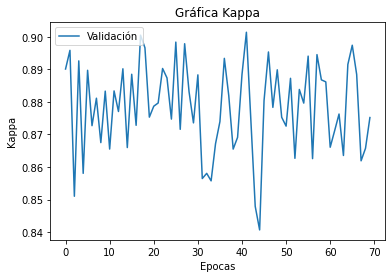

In [ ]:
plt.plot(qwk.history)
plt.title('Gráfica Kappa')
plt.ylabel('Kappa')
plt.xlabel('Epocas')
plt.legend(['Validación'], loc='upper left')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(historip)
df

,loss,accuracy,val_loss,val_accuracy
0,0.720985,0.835569,0.730934,0.814236
1,0.721770,0.838165,0.746946,0.814236
2,0.718813,0.843358,0.790760,0.786458
3,0.711016,0.840329,0.751457,0.819444
4,0.717474,0.842060,0.808766,0.788194
...,...,...,...,...
65,0.548805,0.933795,0.787290,0.833333
66,0.544631,0.928170,0.802947,0.809028
67,0.559612,0.923410,0.833783,0.807292
68,0.540456,0.935093,0.823182,0.812500


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_scatter(x = df.index, y = df['loss'], name= 'Entrenamiento')
fig.add_scatter(x = df.index, y = df['val_loss'], name= 'Validacion')

fig.update_layout(
    title={
        'text': "Gráfica de la función de perdida",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis_title="Épocas",
    yaxis_title="función de perdida",)


fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_scatter(x = df.index, y = df['accuracy'], name= 'Entrenamiento')
fig.add_scatter(x = df.index, y = df['val_accuracy'], name= 'Validacion')


fig.update_layout(
    title={
        'text': "Gráfica del Accuracy",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis_title="Épocas",
    yaxis_title="Accuracy",)

fig.show()

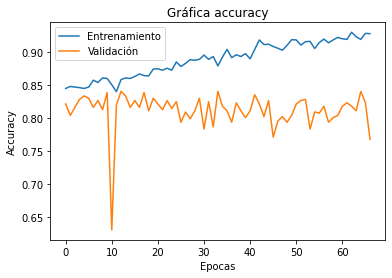

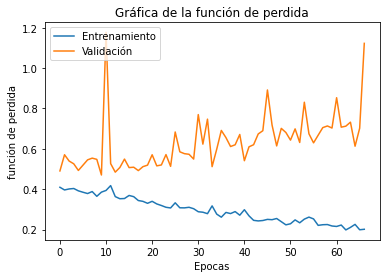

In [ ]:
plt.plot(historip['accuracy'])
plt.plot(historip['val_accuracy'])
plt.title('Gráfica accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historip['loss'])
plt.plot(historip['val_loss'])
plt.title('Gráfica de la función de perdida')
plt.ylabel('función de perdida')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()




In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/scalars

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

In [ ]:
x_test1.shape

(733, 224, 224, 3)

In [ ]:
ypred = model.predict(x_test1/255.0)

In [ ]:
ypred1 = [np.argmax(pred1) for pred1 in ypred]

In [ ]:
y_test11 = [np.argmax(pred1) for pred1 in y_test1]

In [ ]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    
    df_cm = pd.DataFrame(cf, range(len(classes)), range(len(classes)))
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g')
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()

In [ ]:
import seaborn as sns

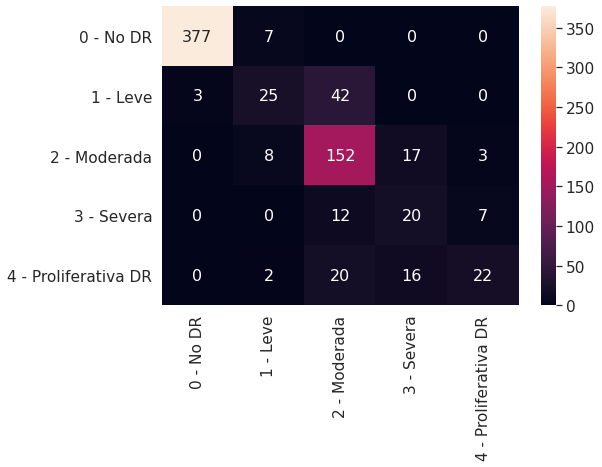

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(y_test11,ypred1,labels)

In [ ]:
cf = confusion_matrix(y_test11, ypred1)

In [ ]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 3 17 74 33 10]
FN
[ 7 45 28 19 38]
TP
[377  25 152  20  22]
TN
[346 646 479 661 663]
Sensitivity
[0.98177083 0.35714286 0.84444444 0.51282051 0.36666667]
Specificity
[0.99140401 0.97435897 0.86618445 0.95244957 0.98514116]
Precision
[0.99210526 0.5952381  0.67256637 0.37735849 0.6875    ]
[0.98016997 0.93487699 0.94477318 0.97205882 0.94579173]
[0.00859599 0.02564103 0.13381555 0.04755043 0.01485884]
[0.01822917 0.64285714 0.15555556 0.48717949 0.63333333]
[0.00789474 0.4047619  0.32743363 0.62264151 0.3125    ]
Acc
[0.98635744 0.9154161  0.86084584 0.92905866 0.93451569]
Sensitivity mean
0.6125690628815629
Specificity mean
0.9539076321992328
Precision mean
0.6649536441286887


In [ ]:
#spec = TP/TP+FN
#sens = TN/TN+FP

[[370   6   8   0   0]
 [  3  16  51   0   0]
 [  5   9 160   1   5]
 [  0   0  32   1   6]
 [  1   4  39   1  15]]


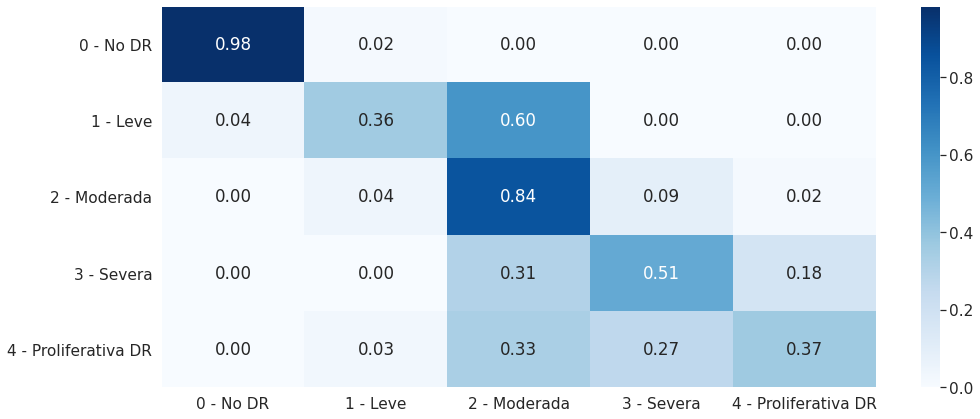

In [ ]:
cnf_matrix = confusion_matrix(y_test11, ypred1)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score( y_test11,ypred1, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(y_test11,ypred1))

print('F1 score: %.3f' % f1_score(y_test11, ypred1,average='micro'))
print('F1 score: %.3f' % f1_score(y_test11, ypred1,average='weighted'))
print('F1 score: %.3f' % f1_score(y_test11, ypred1,average='macro'))

print('Recall: %.3f' % recall_score(y_test11, ypred1,average='micro'))
print('Recall: %.3f' % recall_score(y_test11, ypred1,average='weighted'))
print('Recall: %.3f' % recall_score(y_test11, ypred1,average='macro'))

print('Precision: %.3f' % precision_score(y_test11, ypred1,average='micro'))
print('Precision: %.3f' % precision_score(y_test11, ypred1,average='weighted'))
print('Precision: %.3f' % precision_score(y_test11, ypred1,average='macro'))

print('\n clasification report:\n  ' + classification_report(y_test11, ypred1)) 

Test Cohen Kappa score: 0.906
Test Accuracy score : 0.813
F1 score: 0.813
F1 score: 0.806
F1 score: 0.619
Recall: 0.813
Recall: 0.813
Recall: 0.613
Precision: 0.813
Precision: 0.818
Precision: 0.665

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.98      0.99       384
           1       0.60      0.36      0.45        70
           2       0.67      0.84      0.75       180
           3       0.38      0.51      0.43        39
           4       0.69      0.37      0.48        60

    accuracy                           0.81       733
   macro avg       0.66      0.61      0.62       733
weighted avg       0.82      0.81      0.81       733



Con un generador

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [ ]:
test_gencomplete =  test_datagen.flow(x_test1, y_test1, batch_size=1, seed=2020)

In [ ]:
y_t2 = np.array([[0,0,0,0,0]])


for i in range(733):
  y_t2 =np.append(y_t2, test_gencomplete[i][1], axis=0)

y_t2 = np.delete(y_t2,0, axis=0)

In [ ]:
y_t12 = [np.argmax(pred1) for pred1 in y_t2]

In [ ]:
val_preds = model.predict(test_gencomplete,verbose = 1)

733/733 [==============================] - 15s 21ms/step


In [ ]:
val_preds1 = [np.argmax(pred) for pred in val_preds]

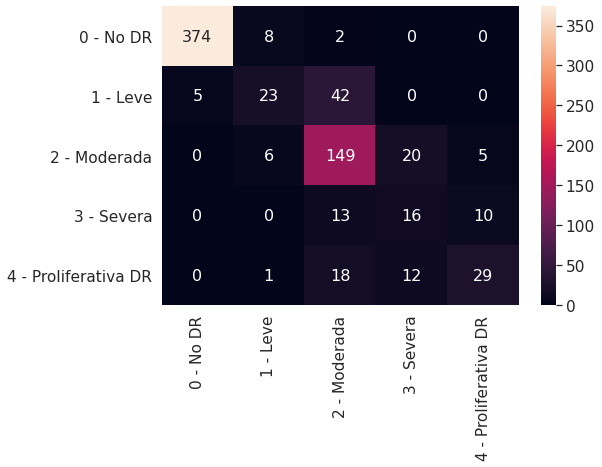

In [ ]:
plot_conf_matrix(y_t12,val_preds1,labels)

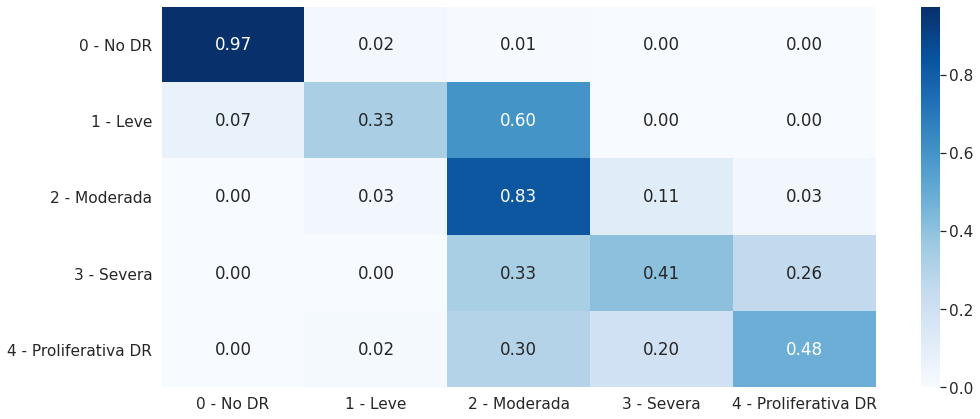

In [ ]:
cnf_matrix = confusion_matrix(y_t12, val_preds1)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [ ]:
cf = cnf_matrix

In [ ]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 5 15 75 32 15]
FN
[10 47 31 23 31]
TP
[374  23 149  16  29]
TN
[344 648 478 662 658]
Sensitivity
[0.97395833 0.32857143 0.82777778 0.41025641 0.48333333]
Specificity
[0.98567335 0.97737557 0.86437613 0.95389049 0.97771174]
Precision
[0.98680739 0.60526316 0.66517857 0.33333333 0.65909091]
[0.97175141 0.9323741  0.93909627 0.96642336 0.95500726]
[0.01432665 0.02262443 0.13562387 0.04610951 0.02228826]
[0.02604167 0.67142857 0.17222222 0.58974359 0.51666667]
[0.01319261 0.39473684 0.33482143 0.66666667 0.34090909]
Acc
[0.97953615 0.9154161  0.85538881 0.92496589 0.9372442 ]
Sensitivity mean
0.6047794566544566
Specificity mean
0.9518054553286495
Precision mean
0.6499346719220696


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds1, y_t12, weights='quadratic'))

Test Cohen Kappa score: 0.908


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score( y_t12, val_preds1, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(y_t12,val_preds1))

print('F1 score: %.3f' % f1_score(y_t12, val_preds1,average='micro'))
print('F1 score: %.3f' % f1_score(y_t12, val_preds1,average='weighted'))
print('F1 score: %.3f' % f1_score(y_t12, val_preds1,average='macro'))

print('Recall: %.3f' % recall_score(y_t12, val_preds1,average='micro'))
print('Recall: %.3f' % recall_score(y_t12, val_preds1,average='weighted'))
print('Recall: %.3f' % recall_score(y_t12, val_preds1,average='macro'))

print('Precision: %.3f' % precision_score(y_t12, val_preds1,average='micro'))
print('Precision: %.3f' % precision_score(y_t12, val_preds1,average='weighted'))
print('Precision: %.3f' % precision_score(y_t12, val_preds1,average='macro'))


print('\n clasification report:\n  ' + classification_report(y_t12, val_preds1)) 

Test Cohen Kappa score: 0.908
Test Accuracy score : 0.806
F1 score: 0.806
F1 score: 0.801
F1 score: 0.614
Recall: 0.806
Recall: 0.806
Recall: 0.605
Precision: 0.806
Precision: 0.810
Precision: 0.650

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.97      0.98       384
           1       0.61      0.33      0.43        70
           2       0.67      0.83      0.74       180
           3       0.33      0.41      0.37        39
           4       0.66      0.48      0.56        60

    accuracy                           0.81       733
   macro avg       0.65      0.60      0.61       733
weighted avg       0.81      0.81      0.80       733

